> To live! like a tree alone and free,
> and like a forest in solidarity...
> Nazim Hikmet

# Random Forests



__Objectives__

- Introduction of 'bagging' procedure.

- Identifying the need for bootstrapping for random forests

- Comparing Random forests and bagging methods

- Evaluating a model by random forest model

## Bootstrapping


<img src= "img/bootstrap1.png" style="height:250px">


# Bagging (Boostrapping + Aggregating)


Let's us one more time recall that if $Z_{1}, \cdots, Z_{n}$ are independent observations with variance $\sigma^{2}$ then the variance of the mean $\bar{Z}$ is given by $\frac{\sigma^{2}}{n}$. 

__How is this relevant now?__



We will use this idea calculate $$ \hat{f}^{1}(x), \cdots, \hat{f}^{B}(x)$$ where each $\hat{f}^{i}$ represents a decision tree fitted to the bootstrapped data.

Then we will make a prediction by: 

$$ \hat{f}_{\text{avg}}(x) = \frac{1}{B}\sum_{b=1}^{B} \hat{f}^{b}(x)$$

Note that this is for regression and for the classification we can get majority vote.

_side note: [sklearn averages over probabilities not majority vote](https://scikit-learn.org/stable/modules/ensemble.html#forest)_


## Sklearn for Random Forests

In [1]:
import pandas as pd
import numpy as np

In [2]:
# you can download the data from -- https://www.kaggle.com/ishaanv/ISLR-Auto#Heart.csv

# or http://faculty.marshall.usc.edu/gareth-james/ISL/data.html
heart = pd.read_csv('data/Heart.csv', index_col=0)
heart.head()
print(heart.shape)

(303, 14)


In [3]:
heart.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [4]:
heart.dropna(axis=0, how='any', inplace=True)
y = heart.AHD
X = heart.drop(columns='AHD')

In [5]:
X.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal


In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 1 to 302
Data columns (total 13 columns):
Age          297 non-null int64
Sex          297 non-null int64
ChestPain    297 non-null object
RestBP       297 non-null int64
Chol         297 non-null int64
Fbs          297 non-null int64
RestECG      297 non-null int64
MaxHR        297 non-null int64
ExAng        297 non-null int64
Oldpeak      297 non-null float64
Slope        297 non-null int64
Ca           297 non-null float64
Thal         297 non-null object
dtypes: float64(2), int64(9), object(2)
memory usage: 32.5+ KB


In [8]:
display(X.Thal.value_counts(normalize=True))
display(X.ChestPain.value_counts(normalize=True))

normal        0.552189
reversable    0.387205
fixed         0.060606
Name: Thal, dtype: float64

asymptomatic    0.478114
nonanginal      0.279461
nontypical      0.164983
typical         0.077441
Name: ChestPain, dtype: float64

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, stratify=y)

In [10]:
from sklearn.preprocessing import OneHotEncoder

In [16]:
categorical_variables = list(X_train.select_dtypes(include=['object']).columns)
numerical_variables = list(X_train.select_dtypes(include = ['int64', 'float64']).columns)

In [23]:
numerical_variables

['Age', 'Sex', 'RestBP', 'Chol', 'Fbs', 'MaxHR', 'ExAng', 'Oldpeak', 'Ca']

In [21]:
categorical_variables.append(numerical_variables.pop(-2))

In [22]:
categorical_variables

['ChestPain', 'Thal', 'RestECG', 'Slope']

In [24]:
ohe = OneHotEncoder(drop='first')
X_categ = ohe.fit_transform(X_train[categorical_variables]).toarray()
X_num = X_train[numerical_variables].values
Xtrain = np.concatenate((X_categ, X_num), axis=-1,)
Xtrain.shape

(237, 18)

In [26]:
ohe.get_feature_names()

array(['x0_nonanginal', 'x0_nontypical', 'x0_typical', 'x1_normal',
       'x1_reversable', 'x2_1', 'x2_2', 'x3_2', 'x3_3'], dtype=object)

In [27]:
numerical_variables

['Age', 'Sex', 'RestBP', 'Chol', 'Fbs', 'MaxHR', 'ExAng', 'Oldpeak', 'Ca']

In [25]:
Xtrain

array([[0. , 0. , 0. , ..., 1. , 3. , 1. ],
       [0. , 0. , 0. , ..., 1. , 0. , 3. ],
       [0. , 0. , 1. , ..., 0. , 1.4, 1. ],
       ...,
       [1. , 0. , 0. , ..., 0. , 0.2, 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 1. , 0. , 0. ]])

In [28]:
# now we should transform the test data
# to be able to use it for the prediction

X_test_categ = ohe.transform(X_test[categorical_variables]).toarray()
X_test_num = X_test[numerical_variables].values
Xtest = np.concatenate((X_test_categ, X_test_num), axis=-1,)
Xtest.shape

(60, 18)

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
clf = RandomForestClassifier(n_estimators=100,
                             criterion='gini',
                             max_features='auto',
                             oob_score=True)

In [31]:
clf.fit(Xtrain, y_train)
print(clf.score(Xtrain, y_train))
print(clf.score(Xtest, y_test))

1.0
0.75


__Your Turn__

- Use 5 fold cross_validation to fit random forest classifier we created above.
- Don't forget to return training scores and trained estimators.

In [32]:
from sklearn.model_selection import cross_validate

In [33]:
cv = cross_validate(clf, Xtrain, y_train, return_estimator=True, return_train_score=True)

__Your Turn__

- What is the type of validator above?

- Check test vs train(validation) scores.

- Print "mean +/- std" for both train and test scores

- Also print oob_scores and compare them with cross_validation scores

In [34]:
type(cv)

dict

In [35]:
cv

{'fit_time': array([0.1965189 , 0.14217305, 0.14335299, 0.14040613, 0.14032793]),
 'score_time': array([0.00724697, 0.00722003, 0.00705695, 0.00631189, 0.00611186]),
 'estimator': (RandomForestClassifier(oob_score=True),
  RandomForestClassifier(oob_score=True),
  RandomForestClassifier(oob_score=True),
  RandomForestClassifier(oob_score=True),
  RandomForestClassifier(oob_score=True)),
 'test_score': array([0.8125    , 0.8125    , 0.78723404, 0.74468085, 0.82978723]),
 'train_score': array([1., 1., 1., 1., 1.])}

In [37]:
cv['test_score'].mean()

0.797340425531915

In [38]:
clf.fit(Xtrain, y_train)
clf.oob_score_

0.7932489451476793

__Your Turn__

- Note that we have over-fitting problem. 

- Let's try to reduce over-fitting

In [ ]:
y_train.value_counts()

In [41]:
clf = RandomForestClassifier(max_depth=10,
                             max_features='log2',
                             min_samples_split=4,
                             oob_score=True)

clf.fit(Xtrain, y_train)
print(clf.score(Xtrain, y_train))
print(clf.oob_score_)

0.9957805907172996
0.7763713080168776


### Do it with Pipelines!

In [50]:
# There is an "easier" way to do this
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier

In [51]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))])

preprocessor = ColumnTransformer(transformers=[
        ('num', numeric_transformer, numerical_variables),
        ('cat', categorical_transformer, categorical_variables)],)

rf = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', RandomForestClassifier(oob_score=True))])

In [52]:
pipe_validator = cross_validate(rf,
                                X_train,
                                y_train,
                                return_train_score=True,
                                return_estimator=True)

In [53]:
# train scores
print(pipe_validator['train_score'])
# validation scores
print(pipe_validator['test_score'])

# let's pick one of the estimator for further investigation

est = pipe_validator['estimator'][0]

[1. 1. 1. 1. 1.]
[0.79166667 0.8125     0.76595745 0.74468085 0.85106383]


In [54]:
est['classifier'].oob_score_

0.7724867724867724

## Feature Importance

In [42]:
feature_importances = clf.feature_importances_

In [43]:
feature_importances

array([0.0339622 , 0.01311059, 0.02084127, 0.12453562, 0.10938066,
       0.00055574, 0.01845291, 0.02780802, 0.00479609, 0.07784278,
       0.03524566, 0.07579742, 0.08325035, 0.00827238, 0.09869391,
       0.06757153, 0.10418933, 0.09569355])

In [47]:
# be careful with the order of columns
columns = ohe.get_feature_names().tolist() + numerical_variables

In [48]:
importances = pd.DataFrame(data=feature_importances,
                           index=columns, columns=['feature_importances'])

importances.sort_values(by='feature_importances', ascending=False)

,feature_importances
x1_normal,0.124536
x1_reversable,0.109381
Oldpeak,0.104189
MaxHR,0.098694
Ca,0.095694
Chol,0.083250
Age,0.077843
RestBP,0.075797
ExAng,0.067572
Sex,0.035246


In [49]:
importances.feature_importances.sum()

1.0

### Visualize a random tree

In [55]:
clf

RandomForestClassifier(max_depth=10, max_features='log2', min_samples_split=4,
                       oob_score=True)

In [57]:
clf.estimators_[:3]

[DecisionTreeClassifier(max_depth=10, max_features='log2', min_samples_split=4,
                        random_state=1875861109),
 DecisionTreeClassifier(max_depth=10, max_features='log2', min_samples_split=4,
                        random_state=1472164318),
 DecisionTreeClassifier(max_depth=10, max_features='log2', min_samples_split=4,
                        random_state=2057195374)]

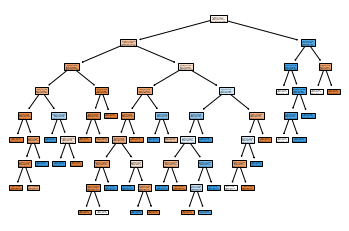

In [60]:
from sklearn import tree
%matplotlib inline
random_tree = np.random.choice(clf.estimators_)
tree.plot_tree(random_tree, filled=True);

### Extra Material 

- [Sklearn averages probabilities in RF implementation](https://scikit-learn.org/stable/modules/ensemble.html#forest)

- [On the variance](https://newonlinecourses.science.psu.edu/stat414/node/167/)

- [Is RF immune to overfitting?](https://en.wikipedia.org/wiki/Talk%3ARandom_forest)

- [Tricky stuff with respect to feature importance](http://rnowling.github.io/machine/learning/2015/08/10/random-forest-bias.html)

- [An interesting implementation of feature importance](https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances_faces.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-faces-py)

- [Different Ensemble Methods in sklearn](https://scikit-learn.org/stable/modules/ensemble.html#forest)

- [ISLR - section 8.2](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf)

- [Another library for RF: H2o](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/drf.html)